# UNIVARIATE TIME SERIES ANALYSIS AND FORECASTING OF SINALOA'S FISH PRODUCTION

## 1. ABOUT THE PROJECT

**Author**: Fernando A. Martinez Urrutia

As a Data Analysts | Scientist we use data as our source of power. If knowledge is power and data is knowledge then by logic data is power!…But **every power comes with great responsibility**. Lets imagine for a moment that you're the secretariat of natural resources of your country…what would be the first thing you would like to know about the different sectors that you manage? What decisions would you make based on the data presented to you? What programs would you invest or stop investing in?…THAT is the power that data can have on our life.

**Objective**: 
In this project I'll analyze the mexican fishing industry over the period of 2017-2020 in order to detect major trends and potential growth opportunities. After an intial exploratory data analysis, an univariate Machine Learning Model will be selected to best predict the monetary production of the most productive state.

**About the data:** This data set is composed by 4 csv tables from the fishing production from the years 2017 to 2020 reported by CONAPESCA (National Comission of Fishing and Aquaculture). Giving a total dataframe of 312,700 entries, each with 12 attributes.
*"Produccion Pesquera, Datos y Recursos", published by CONAPESCA. Obtained from https://datos.gob.mx/busca/dataset/produccion-pesquera. the 2021-01-20*

**Tools used:** Exploratory Data Analysis, Data Cleaning, Data Visualization.

regex, pandas, numpy, v


##  2. DATA PREPROCESS

### 2.1. Data Extraction

For our analysis we will use data from the years 2017 to 2020. Please download the .csv files from the provided references and load it to your jupiter notebook or to Visual Studio Code; upload the files to a folder named "data" in your workspace

In [135]:
import pandas as pd
import numpy as np

we now turn the CSV files to dataframes using the pandas library and concatenated them into a single dataframe called "df"

In [136]:
df2017=pd.read_csv('data/Produccion_Pesquera_2017.csv',encoding='latin-1')
df2018=pd.read_csv('data/Produccion_Pesquera_2018.csv',encoding='latin-1')
df2019=pd.read_csv('data/Produccion_Pesquera_2019.csv',encoding='latin-1')
df2020=pd.read_csv('data/Produccion_Pesquera_2020.csv',encoding='latin-1')
df=pd.concat([df2017, df2018,df2019,df2020],axis=0)
display(df.head(20))


,EJERCICIO FISCAL,ENTIDAD FEDERATIVA,NOMBRE OFICINA,MES DE CORTE,ORIGEN,NOMBRE COMUN,PESO DESEMBARCADO KILOGRAMOS,PESO VIVO KILOGRAMOS,VALOR PESOS,NOMBRE PRINCIPAL,CLAVE DE ENTIDAD,CLAVE DE OFICINA
0,2017.0,BAJA CALIFORNIA,SAN FELIPE,JULIO,CAPTURA,ABADEJO,94,94.0,3119.6928,MERO,2.0,207.0
1,2017.0,BAJA CALIFORNIA,SAN FELIPE,JULIO,CAPTURA,ABADEJO,1400,1540.0,46424,MERO,2.0,207.0
2,2017.0,BAJA CALIFORNIA SUR,BAHIA ASUNCION,AGOSTO,CAPTURA,ABADEJO,4397,4397.0,159567.13,MERO,3.0,313.0
3,2017.0,BAJA CALIFORNIA SUR,SANTA ROSALIA,NOVIEMBRE,CAPTURA,ABADEJO,17,17.0,616.93,MERO,3.0,312.0
4,2017.0,COLIMA,TECOMAN,FEBRERO,CAPTURA,ABADEJO,4587,4587.0,166462.23,MERO,6.0,602.0
5,2017.0,CAMPECHE,ATASTA,NOVIEMBRE,CAPTURA,ABADEJO,4406,4406.0,159899.1835,MERO,4.0,410.0
6,2017.0,CAMPECHE,CAMPECHE,ENERO,CAPTURA,ABADEJO,18,18.0,611.6664,MERO,4.0,401.0
7,2017.0,CAMPECHE,CAMPECHE,ABRIL,CAPTURA,ABADEJO,103,103.0,3525.9621,MERO,4.0,401.0
8,2017.0,CAMPECHE,CAMPECHE,MAYO,CAPTURA,ABADEJO,189,189.0,6578.2216,MERO,4.0,401.0
9,2017.0,CAMPECHE,CHAMPOTON,MAYO,CAPTURA,ABADEJO,52,52.0,1767.647,MERO,4.0,404.0


### 2.2 Data Cleaning

#### 2.2.1 DataFrame Insight

The first step we want to take is to known our data.
what type of data we have?, how much data we have? and to obtain it's main metrics. 

In [137]:
display (df.shape)
display(df.info(show_counts=True))
display(df.describe(include='all'))

(312752, 12)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 312752 entries, 0 to 63235
Data columns (total 12 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   EJERCICIO FISCAL              251440 non-null  float64
 1   ENTIDAD FEDERATIVA            251440 non-null  object 
 2   NOMBRE OFICINA                251440 non-null  object 
 3   MES DE CORTE                  251440 non-null  object 
 4   ORIGEN                        251440 non-null  object 
 5   NOMBRE COMUN                  251440 non-null  object 
 6   PESO DESEMBARCADO KILOGRAMOS  251440 non-null  object 
 7   PESO VIVO KILOGRAMOS          251440 non-null  object 
 8   VALOR PESOS                   251440 non-null  object 
 9   NOMBRE PRINCIPAL              251440 non-null  object 
 10  CLAVE DE ENTIDAD              251440 non-null  float64
 11  CLAVE DE OFICINA              251440 non-null  float64
dtypes: float64(3), object(9)
memory usage: 31.0+ 

None

,EJERCICIO FISCAL,ENTIDAD FEDERATIVA,NOMBRE OFICINA,MES DE CORTE,ORIGEN,NOMBRE COMUN,PESO DESEMBARCADO KILOGRAMOS,PESO VIVO KILOGRAMOS,VALOR PESOS,NOMBRE PRINCIPAL,CLAVE DE ENTIDAD,CLAVE DE OFICINA
count,251440.000000,251440,251440,251440,251440,251440,251440,251440,251440,251440,251440.000000,251440.000000
unique,NaN,31,157,12,2,675,67919,77851,170970,57,NaN,NaN
top,NaN,BAJA CALIFORNIA SUR,ENSENADA,MARZO,CAPTURA,TILAPIA SE,100,0,"6,000",OTRAS,NaN,NaN
freq,NaN,31614,5571,22339,230078,10935,1438,1250,247,48999,NaN,NaN
mean,2018.489449,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17.789373,1784.014067
std,1.124732,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.575871,1058.024604
min,2017.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,101.000000
25%,2017.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.000000,410.000000
50%,2018.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20.000000,2004.000000
75%,2020.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,27.000000,2705.000000


- note how we have 312,752 rows but only 251,440 from those are not null.
- Summary stadistics were calculated for 'EJERCICIO FISCAL','CLAVE DE OFICINA' and 'CLAVE DE ENTIDAD' although they should be categorical values.
- Note how we have 2 type of columns objects and float values. 
- The stadistical descriptors were not calculated for the numerical columns, meaning they must contain mixed data or strings; this will be solved in the following cells. 

#### 2.2.2 Renaming columns and dropping columns that will not be used

In [138]:
#rename columns and data frame and deletion of the 2 last columns which will not be used. 
df = df.rename(columns={'ENTIDAD FEDERATIVA':'STATE','EJERCICIO FISCAL':'YEAR','NOMBRE OFICINA':'OFFICE',"NOMBRE PRINCIPAL":'FAMILY',"NOMBRE COMUN":'SPECIE',"MES DE CORTE":"MONTH","VALOR PESOS":"PROFIT","PESO VIVO KILOGRAMOS":"LIVE_CAPTURED_KG","PESO DESEMBARCADO KILOGRAMOS":"UNEMBARKED_KG","ORIGEN":"ORIGIN"}).drop(columns=['CLAVE DE ENTIDAD','CLAVE DE OFICINA'])
df.head(10)

,YEAR,STATE,OFFICE,MONTH,ORIGIN,SPECIE,UNEMBARKED_KG,LIVE_CAPTURED_KG,PROFIT,FAMILY
0,2017.0,BAJA CALIFORNIA,SAN FELIPE,JULIO,CAPTURA,ABADEJO,94,94.0,3119.6928,MERO
1,2017.0,BAJA CALIFORNIA,SAN FELIPE,JULIO,CAPTURA,ABADEJO,1400,1540.0,46424,MERO
2,2017.0,BAJA CALIFORNIA SUR,BAHIA ASUNCION,AGOSTO,CAPTURA,ABADEJO,4397,4397.0,159567.13,MERO
3,2017.0,BAJA CALIFORNIA SUR,SANTA ROSALIA,NOVIEMBRE,CAPTURA,ABADEJO,17,17.0,616.93,MERO
4,2017.0,COLIMA,TECOMAN,FEBRERO,CAPTURA,ABADEJO,4587,4587.0,166462.23,MERO
5,2017.0,CAMPECHE,ATASTA,NOVIEMBRE,CAPTURA,ABADEJO,4406,4406.0,159899.1835,MERO
6,2017.0,CAMPECHE,CAMPECHE,ENERO,CAPTURA,ABADEJO,18,18.0,611.6664,MERO
7,2017.0,CAMPECHE,CAMPECHE,ABRIL,CAPTURA,ABADEJO,103,103.0,3525.9621,MERO
8,2017.0,CAMPECHE,CAMPECHE,MAYO,CAPTURA,ABADEJO,189,189.0,6578.2216,MERO
9,2017.0,CAMPECHE,CHAMPOTON,MAYO,CAPTURA,ABADEJO,52,52.0,1767.647,MERO


#### 2.2.3 Treating missing values and Mixed Dtypes

Given that somes numerical columns are expressed with commas, they will be read as strings. That is the reason behind why the previous stadistical descriptors did not work in the columns, to solve this problem we can remove all commas from numbers using **regex**, transform them to float values and drop the entries with NaN values.

In [139]:
#drop rows in which all data is missing and reset the index
df=df.dropna(how='all').reset_index(drop=True)
display(df)
df = df.replace(',','', regex=True)
display(df)
# transforming string or float values to numbers
cols = ['LIVE_CAPTURED_KG', 'UNEMBARKED_KG', 'PROFIT','YEAR']
df[cols] = df[cols].apply(pd.to_numeric, errors='coerce', axis=1)
#replace NaN with O values
df['YEAR'] = df['YEAR'].replace(np.nan, 0)
df['UNEMBARKED_KG'] = df["UNEMBARKED_KG"].replace(np.nan, 0)
df['LIVE_CAPTURED_KG']= df['LIVE_CAPTURED_KG'].replace(np.nan, 0)
df['PROFIT'] = df['PROFIT'].replace(np.nan, 0)

,YEAR,STATE,OFFICE,MONTH,ORIGIN,SPECIE,UNEMBARKED_KG,LIVE_CAPTURED_KG,PROFIT,FAMILY
0,2017.0,BAJA CALIFORNIA,SAN FELIPE,JULIO,CAPTURA,ABADEJO,94,94.0,3119.6928,MERO
1,2017.0,BAJA CALIFORNIA,SAN FELIPE,JULIO,CAPTURA,ABADEJO,1400,1540.0,46424,MERO
2,2017.0,BAJA CALIFORNIA SUR,BAHIA ASUNCION,AGOSTO,CAPTURA,ABADEJO,4397,4397.0,159567.13,MERO
3,2017.0,BAJA CALIFORNIA SUR,SANTA ROSALIA,NOVIEMBRE,CAPTURA,ABADEJO,17,17.0,616.93,MERO
4,2017.0,COLIMA,TECOMAN,FEBRERO,CAPTURA,ABADEJO,4587,4587.0,166462.23,MERO
...,...,...,...,...,...,...,...,...,...,...
251435,2020.0,PUEBLA,PUEBLA,AGOSTO,ACUACULTURA,TRUCHA SE,"1,984","1,984","150,139",TRUCHA
251436,2020.0,PUEBLA,PUEBLA,OCTUBRE,ACUACULTURA,TRUCHA SE,"3,100","3,100","211,463",TRUCHA
251437,2020.0,PUEBLA,PUEBLA,NOVIEMBRE,ACUACULTURA,TRUCHA SE,484,484,"36,477",TRUCHA
251438,2020.0,PUEBLA,PUEBLA,DICIEMBRE,ACUACULTURA,TRUCHA SE,"16,615","16,615","1,208,277",TRUCHA


,YEAR,STATE,OFFICE,MONTH,ORIGIN,SPECIE,UNEMBARKED_KG,LIVE_CAPTURED_KG,PROFIT,FAMILY
0,2017.0,BAJA CALIFORNIA,SAN FELIPE,JULIO,CAPTURA,ABADEJO,94,94.0,3119.6928,MERO
1,2017.0,BAJA CALIFORNIA,SAN FELIPE,JULIO,CAPTURA,ABADEJO,1400,1540.0,46424,MERO
2,2017.0,BAJA CALIFORNIA SUR,BAHIA ASUNCION,AGOSTO,CAPTURA,ABADEJO,4397,4397.0,159567.13,MERO
3,2017.0,BAJA CALIFORNIA SUR,SANTA ROSALIA,NOVIEMBRE,CAPTURA,ABADEJO,17,17.0,616.93,MERO
4,2017.0,COLIMA,TECOMAN,FEBRERO,CAPTURA,ABADEJO,4587,4587.0,166462.23,MERO
...,...,...,...,...,...,...,...,...,...,...
251435,2020.0,PUEBLA,PUEBLA,AGOSTO,ACUACULTURA,TRUCHA SE,1984,1984,150139,TRUCHA
251436,2020.0,PUEBLA,PUEBLA,OCTUBRE,ACUACULTURA,TRUCHA SE,3100,3100,211463,TRUCHA
251437,2020.0,PUEBLA,PUEBLA,NOVIEMBRE,ACUACULTURA,TRUCHA SE,484,484,36477,TRUCHA
251438,2020.0,PUEBLA,PUEBLA,DICIEMBRE,ACUACULTURA,TRUCHA SE,16615,16615,1208277,TRUCHA


In [140]:
print("NaN in YEAR",df['YEAR'].isnull().sum())
print("NaN in UNEMBARKED_KG",df['UNEMBARKED_KG'].isnull().sum())
print("NaN in LIVE_CAPTURED_KG",df['LIVE_CAPTURED_KG'].isnull().sum())
print("NaN in PROFIT",df['PROFIT'].isnull().sum())
print("NaN in YEAR",df['YEAR'].isnull().values.any())
print("NaN in UNEMBARKED_KG",df['UNEMBARKED_KG'].isnull().values.any())
print("NaN in LIVE_CAPTURED_KG",df['LIVE_CAPTURED_KG'].isnull().values.any())
print("NaN in PROFIT",df['PROFIT'].isnull().values.any())


NaN in YEAR 0
NaN in UNEMBARKED_KG 0
NaN in LIVE_CAPTURED_KG 0
NaN in PROFIT 0
NaN in YEAR False
NaN in UNEMBARKED_KG False
NaN in LIVE_CAPTURED_KG False
NaN in PROFIT False


**classify of columns between categories and numbers**

In [141]:
#transform numerical colums to int64
columns=['LIVE_CAPTURED_KG', 'UNEMBARKED_KG', 'PROFIT']
df[columns]=df[columns].astype(np.int64)
#transform objects to categories
for col in ['STATE', 'MONTH', 'ORIGIN','SPECIE','FAMILY','OFFICE']:df[col] = df[col].astype("category")
display(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 251440 entries, 0 to 251439
Data columns (total 10 columns):
 #   Column            Non-Null Count   Dtype   
---  ------            --------------   -----   
 0   YEAR              251440 non-null  float64 
 1   STATE             251440 non-null  category
 2   OFFICE            251440 non-null  category
 3   MONTH             251440 non-null  category
 4   ORIGIN            251440 non-null  category
 5   SPECIE            251440 non-null  category
 6   UNEMBARKED_KG     251440 non-null  int64   
 7   LIVE_CAPTURED_KG  251440 non-null  int64   
 8   PROFIT            251440 non-null  int64   
 9   FAMILY            251440 non-null  category
dtypes: category(6), float64(1), int64(3)
memory usage: 9.6 MB


None

#### 2.2.4 turning dataframe into time series

In [142]:
#turn  strings of month to format 01-10 to later concatenate with year column
df["MONTH"].replace({'ENERO':"01","FEBRERO":"02","MARZO":"03","ABRIL":'04',"MAYO":"05","JUNIO":"06","JULIO":"07","AGOSTO":"08","SEPTIEMBRE":"09","OCTUBRE":"10","NOVIEMBRE":"11","DICIEMBRE":"12"},inplace=True)
#convert float values of year to int and latter to interger, as we cannot convert floats "2017.0" to string directly
df["YEAR"]=df["YEAR"].astype(np.int64)
#convert year column to string to be able to concatenate with the month and day
df["YEAR"]=df["YEAR"].astype(str)
#concatenate month and date with year column
df["DATE"]=df[["YEAR","MONTH"]].apply(lambda x: "-".join(x), axis =1)
# turn to timeseries format
df["DATE"]= pd.to_datetime(df["DATE"],format='%Y-%m', errors='coerce')
# even though we have the date in timeseries format, for the exploratory analysis 
# we'll be keeping the year and month in separate columnsn which will faciliate the analysis
# as we will set the date as our index 
df["YEAR"]=df["DATE"].dt.year
df["MONTH"]=df["DATE"].dt.month
df["YEAR"]=df["YEAR"].astype("category")
df["MONTH"]=df["MONTH"].astype("category")

display(df)

,YEAR,STATE,OFFICE,MONTH,ORIGIN,SPECIE,UNEMBARKED_KG,LIVE_CAPTURED_KG,PROFIT,FAMILY,DATE
0,2017,BAJA CALIFORNIA,SAN FELIPE,7,CAPTURA,ABADEJO,94,94,3119,MERO,2017-07-01
1,2017,BAJA CALIFORNIA,SAN FELIPE,7,CAPTURA,ABADEJO,1400,1540,46424,MERO,2017-07-01
2,2017,BAJA CALIFORNIA SUR,BAHIA ASUNCION,8,CAPTURA,ABADEJO,4397,4397,159567,MERO,2017-08-01
3,2017,BAJA CALIFORNIA SUR,SANTA ROSALIA,11,CAPTURA,ABADEJO,17,17,616,MERO,2017-11-01
4,2017,COLIMA,TECOMAN,2,CAPTURA,ABADEJO,4587,4587,166462,MERO,2017-02-01
...,...,...,...,...,...,...,...,...,...,...,...
251435,2020,PUEBLA,PUEBLA,8,ACUACULTURA,TRUCHA SE,1984,1984,150139,TRUCHA,2020-08-01
251436,2020,PUEBLA,PUEBLA,10,ACUACULTURA,TRUCHA SE,3100,3100,211463,TRUCHA,2020-10-01
251437,2020,PUEBLA,PUEBLA,11,ACUACULTURA,TRUCHA SE,484,484,36477,TRUCHA,2020-11-01
251438,2020,PUEBLA,PUEBLA,12,ACUACULTURA,TRUCHA SE,16615,16615,1208277,TRUCHA,2020-12-01


In [143]:
df_fishing_2017_2020=df
df_fishing_2017_2020.describe(include="all")

,YEAR,STATE,OFFICE,MONTH,ORIGIN,SPECIE,UNEMBARKED_KG,LIVE_CAPTURED_KG,PROFIT,FAMILY,DATE
count,251440.0,251440,251440,251440.0,251440,251440,2.514400e+05,2.514400e+05,2.514400e+05,251440,251440
unique,4.0,31,157,12.0,2,675,NaN,NaN,NaN,57,48
top,2017.0,BAJA CALIFORNIA SUR,ENSENADA,3.0,CAPTURA,TILAPIA SE,NaN,NaN,NaN,OTRAS,2017-03-01 00:00:00
freq,64386.0,31614,5571,22339.0,230078,10935,NaN,NaN,NaN,48999,5823
first,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017-01-01 00:00:00
last,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-12-01 00:00:00
mean,NaN,NaN,NaN,NaN,NaN,NaN,2.989888e+04,3.241845e+04,6.668708e+05,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,4.191346e+05,4.635418e+05,9.506821e+06,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,0.000000e+00,0.000000e+00,0.000000e+00,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,2.790000e+02,2.890000e+02,6.454000e+03,NaN,NaN


As we can observe now only the numerical columns are the ones with statistical descriptors

### 2.3 Processed Dataframe file Saving

In [144]:
df_fishing_2017_2020.to_csv("data/df_fishing_2017_2020.csv", index=False)

## 3. EXPLORATORY DATA ANALYSIS

**Questions to answer:**
- Which state is the one with the biggest fish production
- What sector is more profitable: fishing or aquaculture
- Most profitable family of fish in Mexico
- Comparison between first and second places in production --missing
- What are some  major and minor trends in sesonality

### 3.1 dowload libraries

In [145]:
import pandas as pd
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%pip install matplotlib

### 3.2 Statistical descriptors

In [146]:
display(df_fishing_2017_2020.describe(include="all"))
display(df_fishing_2017_2020)

,YEAR,STATE,OFFICE,MONTH,ORIGIN,SPECIE,UNEMBARKED_KG,LIVE_CAPTURED_KG,PROFIT,FAMILY,DATE
count,251440.0,251440,251440,251440.0,251440,251440,2.514400e+05,2.514400e+05,2.514400e+05,251440,251440
unique,4.0,31,157,12.0,2,675,NaN,NaN,NaN,57,48
top,2017.0,BAJA CALIFORNIA SUR,ENSENADA,3.0,CAPTURA,TILAPIA SE,NaN,NaN,NaN,OTRAS,2017-03-01 00:00:00
freq,64386.0,31614,5571,22339.0,230078,10935,NaN,NaN,NaN,48999,5823
first,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017-01-01 00:00:00
last,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-12-01 00:00:00
mean,NaN,NaN,NaN,NaN,NaN,NaN,2.989888e+04,3.241845e+04,6.668708e+05,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,4.191346e+05,4.635418e+05,9.506821e+06,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,0.000000e+00,0.000000e+00,0.000000e+00,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,2.790000e+02,2.890000e+02,6.454000e+03,NaN,NaN


,YEAR,STATE,OFFICE,MONTH,ORIGIN,SPECIE,UNEMBARKED_KG,LIVE_CAPTURED_KG,PROFIT,FAMILY,DATE
0,2017,BAJA CALIFORNIA,SAN FELIPE,7,CAPTURA,ABADEJO,94,94,3119,MERO,2017-07-01
1,2017,BAJA CALIFORNIA,SAN FELIPE,7,CAPTURA,ABADEJO,1400,1540,46424,MERO,2017-07-01
2,2017,BAJA CALIFORNIA SUR,BAHIA ASUNCION,8,CAPTURA,ABADEJO,4397,4397,159567,MERO,2017-08-01
3,2017,BAJA CALIFORNIA SUR,SANTA ROSALIA,11,CAPTURA,ABADEJO,17,17,616,MERO,2017-11-01
4,2017,COLIMA,TECOMAN,2,CAPTURA,ABADEJO,4587,4587,166462,MERO,2017-02-01
...,...,...,...,...,...,...,...,...,...,...,...
251435,2020,PUEBLA,PUEBLA,8,ACUACULTURA,TRUCHA SE,1984,1984,150139,TRUCHA,2020-08-01
251436,2020,PUEBLA,PUEBLA,10,ACUACULTURA,TRUCHA SE,3100,3100,211463,TRUCHA,2020-10-01
251437,2020,PUEBLA,PUEBLA,11,ACUACULTURA,TRUCHA SE,484,484,36477,TRUCHA,2020-11-01
251438,2020,PUEBLA,PUEBLA,12,ACUACULTURA,TRUCHA SE,16615,16615,1208277,TRUCHA,2020-12-01


### 3.3 Visual seasonal analysis

In [147]:
profit=df_fishing_2017_2020.groupby(['YEAR','MONTH']).sum()
display(profit)

UNEMBARKED_KG  LIVE_CAPTURED_KG      PROFIT
YEAR MONTH                                             
2017 1          117725677         127096715  1760088341
     2          130469254         139849995  1916827131
     3          174159964         188584802  2046090689
     4          163373993         175925801  1874688988
     5          177780844         193591877  1710471967
     6          202247811         218020055  2621040211
     7          193710770         207442379  3253405983
     8          148809984         156825429  3821240418
     9          134617227         142533803  4250649191
     10         175949086         187073481  6505433377
     11         217759816         233130540  5799255511
     12         171127586         184778708  4221301838
2018 1          151098081         165922832  2359843912
     2          146729848         160432692  2274836879
     3          171370164         186557700  2394160584
     4          183277972         200090759  2379562418
     5          182638858         200959566  2415267770
     6          229629496         245005628  3033430277
     7          216596907         231374374  3733841407
     8          128710710         136358565  3500360434
     9          118759949         125978374  4047592652
     10         142731546         151401914  6108457355
     11         185355825         199381474  5897385096
     12         141929704         156168616  3583713917
2019 1          105474239         115966905  2477184294
     2          110798417         122136416  2400366401
     3          158230304         175407264  3091067290
     4          158068203         172627722  2411198095
     5          156665201         172752107  2494900314
     6          199583011         216971134  2683625207
     7          203627844         219457699  3677415941
     8          117995617         124846987  3645787709
     9          108144274         113662931  4383420808
     10         144596022         155288706  6624283398
     11         158209132         171261332  5292070640
     12         113494490         126418548  3049717456
2020 1          112759835         125117171  2653616131
     2          114691888         126989729  2519445053
     3          147964509         164483951  2460561835
     4          171928167         192069974  2219114063
     5          172898440         193332678  2052431247
     6          186186769         204865704  2734106544
     7          138367698         147830740  3942997695
     8          108716028         115980192  3546922296
     9          111656656         119131426  4268968993
     10         158055726         170851772  6372178960
     11         175016747         192290734  6453205631
     12         178082955         197066946  4714451669

#### 3.3.1 National Production(MX peso) throughout the years

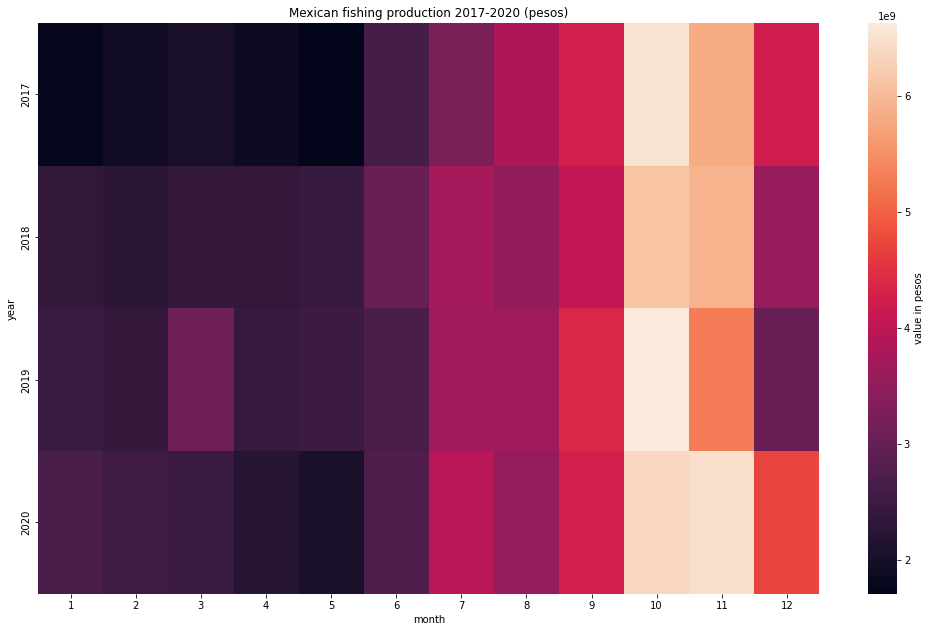

MONTH,1,2,3,4,5,6,7,8,9,10,11,12
YEAR,,,,,,,,,,,,
2017,1760088341,1916827131,2046090689,1874688988,1710471967,2621040211,3253405983,3821240418,4250649191,6505433377,5799255511,4221301838
2018,2359843912,2274836879,2394160584,2379562418,2415267770,3033430277,3733841407,3500360434,4047592652,6108457355,5897385096,3583713917
2019,2477184294,2400366401,3091067290,2411198095,2494900314,2683625207,3677415941,3645787709,4383420808,6624283398,5292070640,3049717456
2020,2653616131,2519445053,2460561835,2219114063,2052431247,2734106544,3942997695,3546922296,4268968993,6372178960,6453205631,4714451669


In [148]:

sales=df_fishing_2017_2020.groupby(["YEAR","MONTH"]).sum()
sales_year_month_peso= sales.reset_index().pivot(index='YEAR',columns="MONTH", values='PROFIT')
sns.heatmap(sales_year_month_peso,cbar_kws={"label":'value in pesos'})
plt.title("Mexican fishing production 2017-2020 (pesos)")
plt.xlabel("month")
plt.ylabel("year")
plt.show()
display(sales_year_month_peso)


#### 3.3.2 Fish captured (kg) and seasonality

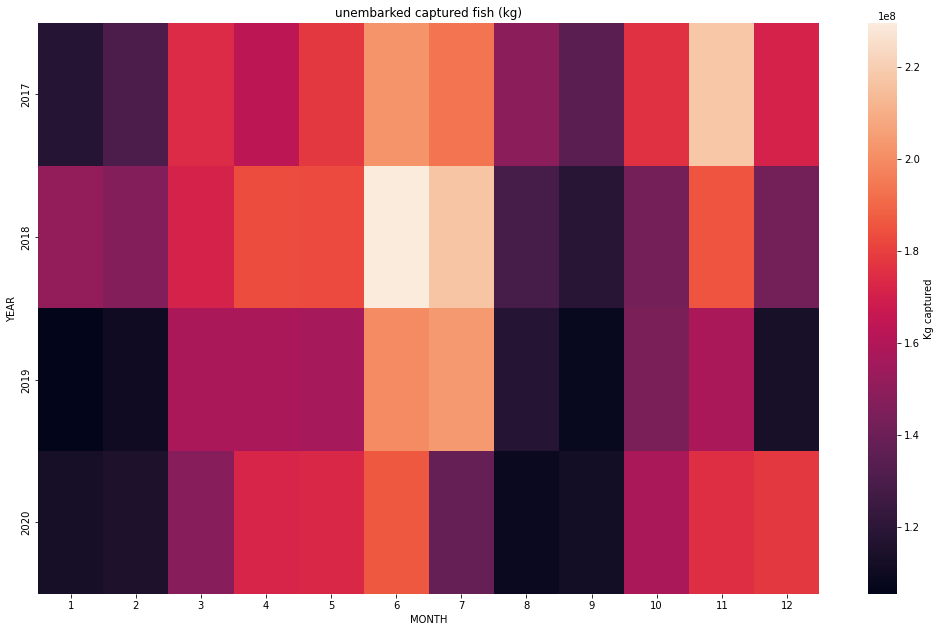

MONTH,1,2,3,4,5,6,7,8,9,10,11,12
YEAR,,,,,,,,,,,,
2017,117725677,130469254,174159964,163373993,177780844,202247811,193710770,148809984,134617227,175949086,217759816,171127586
2018,151098081,146729848,171370164,183277972,182638858,229629496,216596907,128710710,118759949,142731546,185355825,141929704
2019,105474239,110798417,158230304,158068203,156665201,199583011,203627844,117995617,108144274,144596022,158209132,113494490
2020,112759835,114691888,147964509,171928167,172898440,186186769,138367698,108716028,111656656,158055726,175016747,178082955


In [149]:
# calculation of live kg produced
life_kg=df_fishing_2017_2020.groupby(["YEAR","MONTH"]).sum()
life_kg= life_kg.reset_index().pivot(index='YEAR',columns="MONTH", values='UNEMBARKED_KG')
sns.heatmap(life_kg,cbar_kws={"label":'Kg captured'})
plt.title('unembarked captured fish (kg)')
plt.xlabel("MONTH")
plt.ylabel("YEAR")
plt.show()
display(life_kg)

### 3.4 Production by type of fish

In [150]:
df_pivot=df_fishing_2017_2020.pivot_table("PROFIT",["YEAR"],"FAMILY",aggfunc= 'sum')
#df_pivot.sort_values(by="PROFIT",ascending=False)
display(df_pivot)

FAMILY,ABULON,ALGAS,ALMEJA,ANCHOVETA,ATUN,BAGRE,BANDERA,BAQUETA,BARRILETE,BERRUGATA,...,RAYA Y SIMILARES,ROBALO,RONCO,RUBIA Y VILLAJAIBA,RUBIO,SARDINA,SARGAZO,SIERRA,TIBURON,TRUCHA
YEAR,,,,,,,,,,,,,,,,,,,,,
2017,76228441,20799378,580863032,156435563,2424351670,237345165,127025710,97712057,239666940,98282464,...,125757156,830968516,53170234,91125359,72560502,585039552,9090002,417883761,454260118,830738260
2018,102685243,22727174,762043323,210423227,2511553408,187196468,187848254,149256493,863099444,172736717,...,164528473,948456650,77223037,85982803,78176239,623181845,17299389,443351151,624670618,810016168
2019,107774494,6937403,388764015,273126589,2186099223,146177705,194282127,191172120,344569921,204887924,...,148159519,905888288,73057945,153308972,96758499,980787490,5173784,401160682,608710961,234304733
2020,157992927,12891475,281214839,373941851,2145617008,98538464,186715906,259360293,201652258,124417181,...,159417836,814374330,73933531,189921301,136853132,1670003605,8195494,467154629,620798429,202358315


### 3.5 Fishing method comparison

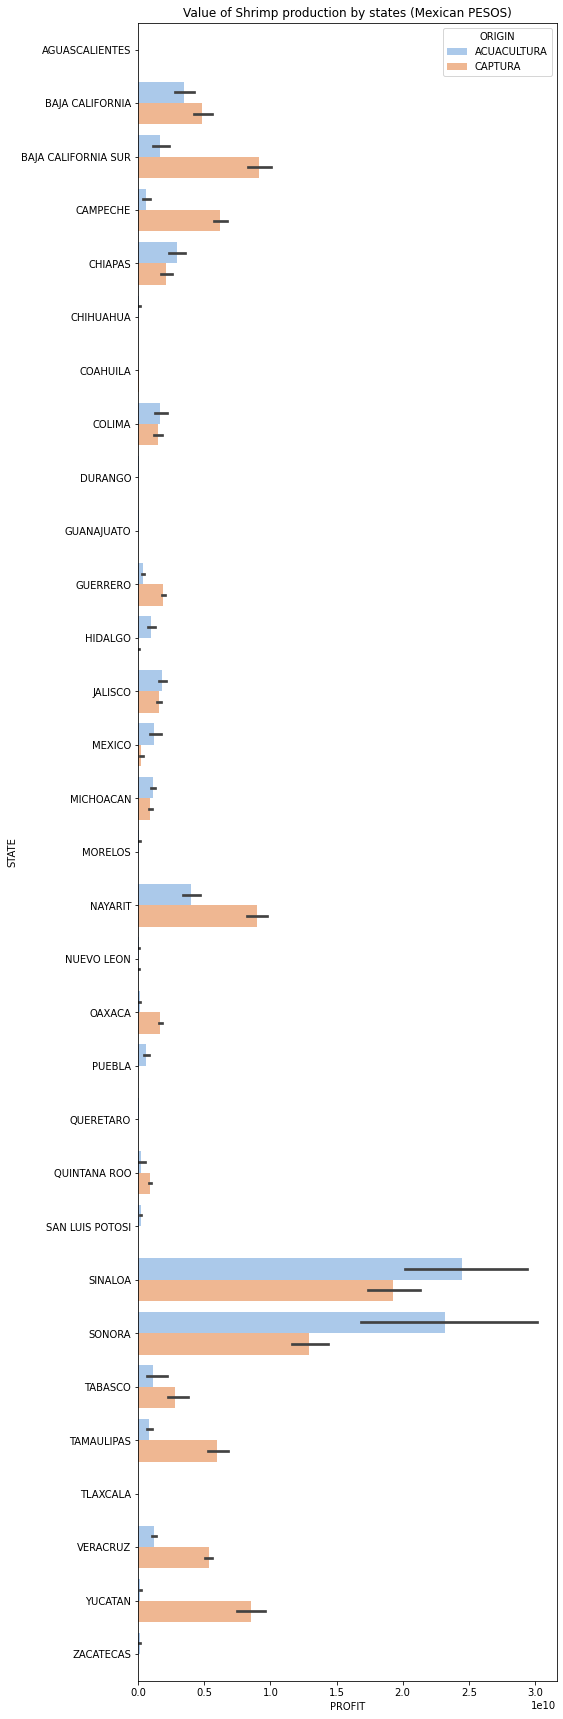

In [151]:
plt.rcParams["figure.figsize"] = [7.50, 30.50]
sns.barplot(x="PROFIT", y="STATE", hue='ORIGIN', palette="pastel",data=df_fishing_2017_2020,estimator=sum)
plt.title("Value of Shrimp production by states (Mexican PESOS)")
plt.show()


### 3.6 Wasted production (Live captured fish vs unembarked fish (Kg))

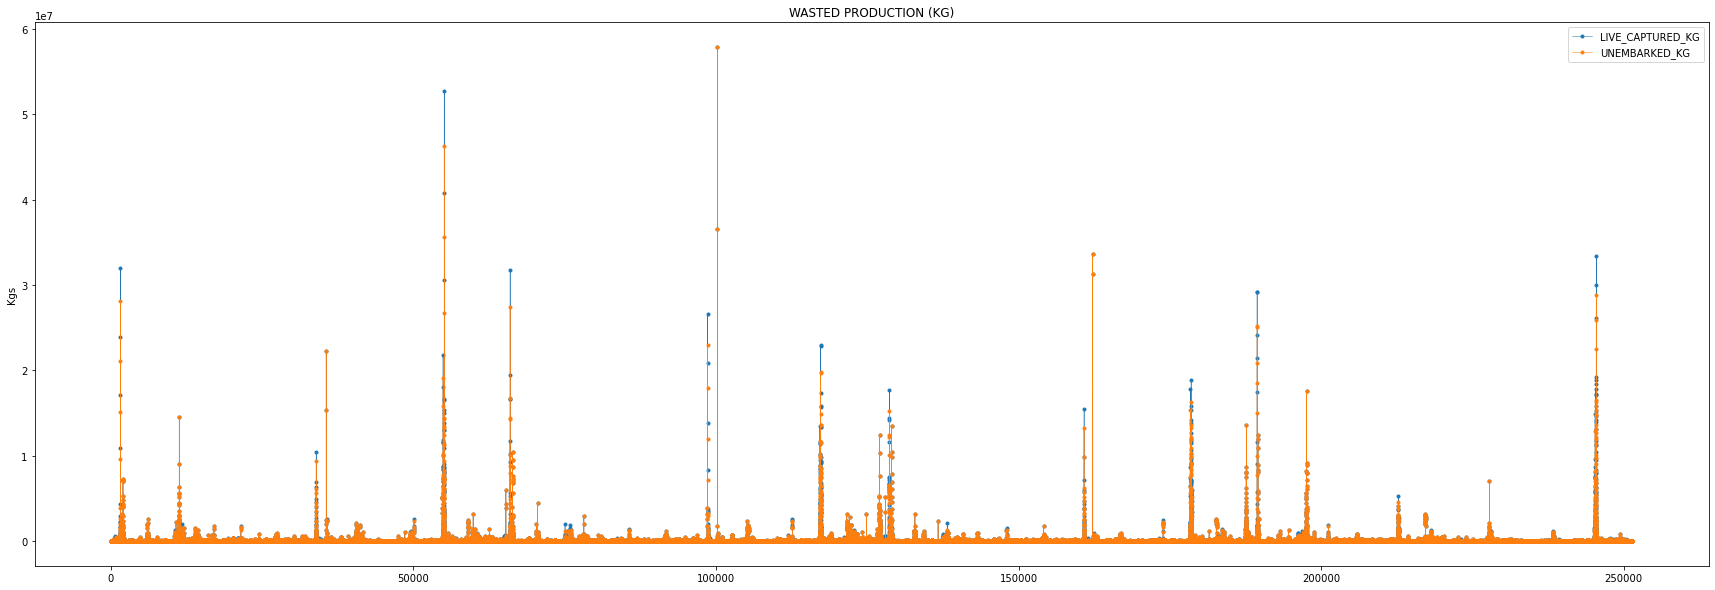

In [152]:
fig, ax = plt.subplots(figsize=(30, 10))
cols_plot =["LIVE_CAPTURED_KG", "UNEMBARKED_KG"]
for nm in cols_plot:
    ax.plot(df_fishing_2017_2020[nm], label=nm, marker='.', linestyle='-', linewidth=0.5)
    ax.legend()
    ax.set_ylabel('Kgs')
    ax.set_title('WASTED PRODUCTION (KG)');

### 3.7 Most productive state analysis

given that we are interested in the total production by state over the perios (2017-2020) we need to get the total sum and not the average as the average is the default.

In [153]:
most_productive=df_fishing_2017_2020.groupby("STATE")['PROFIT',"STATE"].sum().sort_values(by="PROFIT",ascending=False)
display(most_productive)
yearly_production=df_fishing_2017_2020.groupby("YEAR")["PROFIT"].sum()
display(yearly_production)

,PROFIT
STATE,
SINALOA,43737378913
SONORA,36064361503
NAYARIT,12972646258
BAJA CALIFORNIA SUR,10835921012
YUCATAN,8678264872
BAJA CALIFORNIA,8348010806
TAMAULIPAS,6814379801
CAMPECHE,6796683125
VERACRUZ,6572068321


YEAR
2017    39780493645
2018    41728452701
2019    42231037553
2020    43938000117
Name: PROFIT, dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

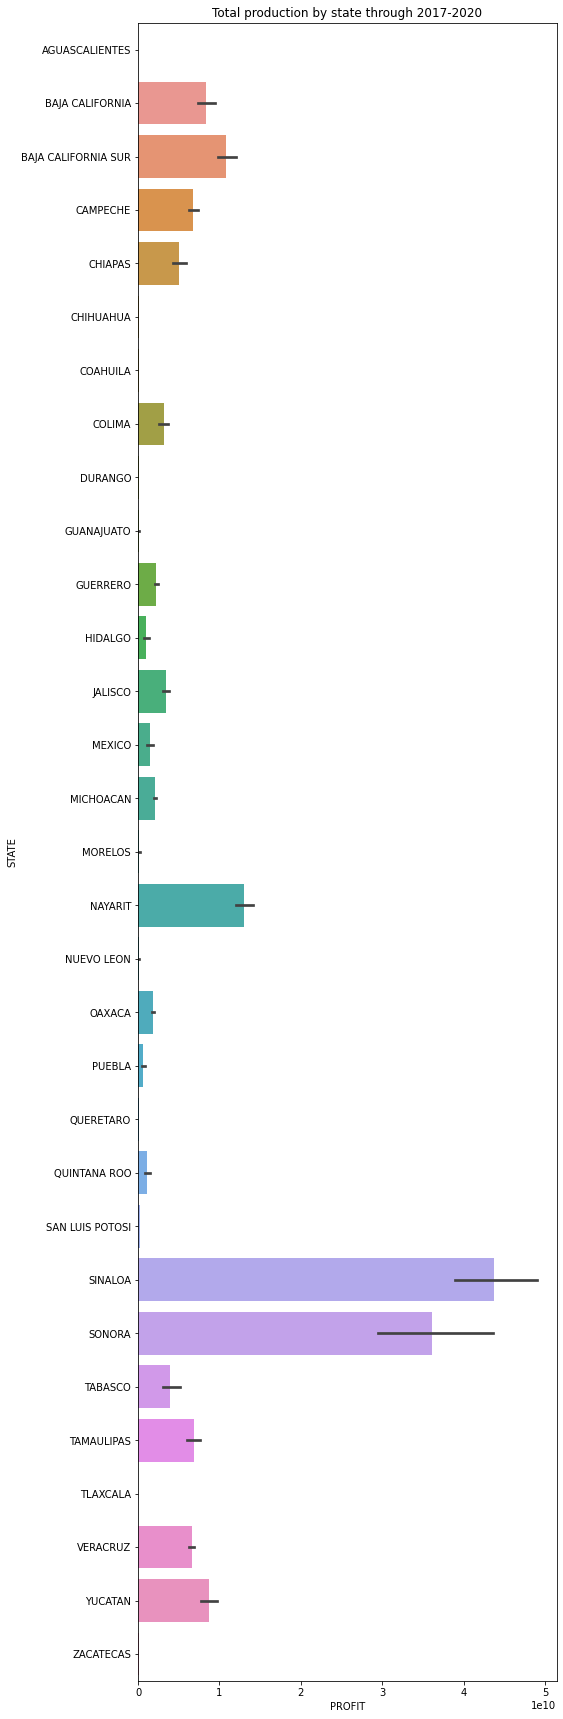

In [154]:
sns.barplot(df_fishing_2017_2020["PROFIT"],df_fishing_2017_2020["STATE"],estimator=sum)
plt.title("Total production by state through 2017-2020")
plt.show


In [155]:
sinaloa_production=df_fishing_2017_2020.loc[df_fishing_2017_2020["STATE"]=="SINALOA"]
sinaloa_production=sinaloa_production.groupby(["DATE"]).sum()
sinaloa_production
sinaloa_production.to_csv("data/sinaloa_production.csv", index=True)


In [156]:
sinaloa_production.describe(include="all")

,UNEMBARKED_KG,LIVE_CAPTURED_KG,PROFIT
count,4.800000e+01,4.800000e+01,4.800000e+01
mean,2.690024e+07,2.863777e+07,9.111954e+08
std,6.860221e+06,7.018272e+06,5.558133e+08
min,1.529000e+07,1.687587e+07,2.471143e+08
25%,2.209793e+07,2.290915e+07,4.304928e+08
50%,2.630078e+07,2.792168e+07,8.754096e+08
75%,3.143293e+07,3.419552e+07,1.256146e+09
max,4.337158e+07,4.648728e+07,2.685839e+09


In [157]:
#sinaloa= df_fishing_2017_2020.groupby('STATE').filter(lambda x : pd.Series('SINALOA').isin(x['STATE']).all()).set_index("DATE")
#sinaloa=sinaloa.pivot


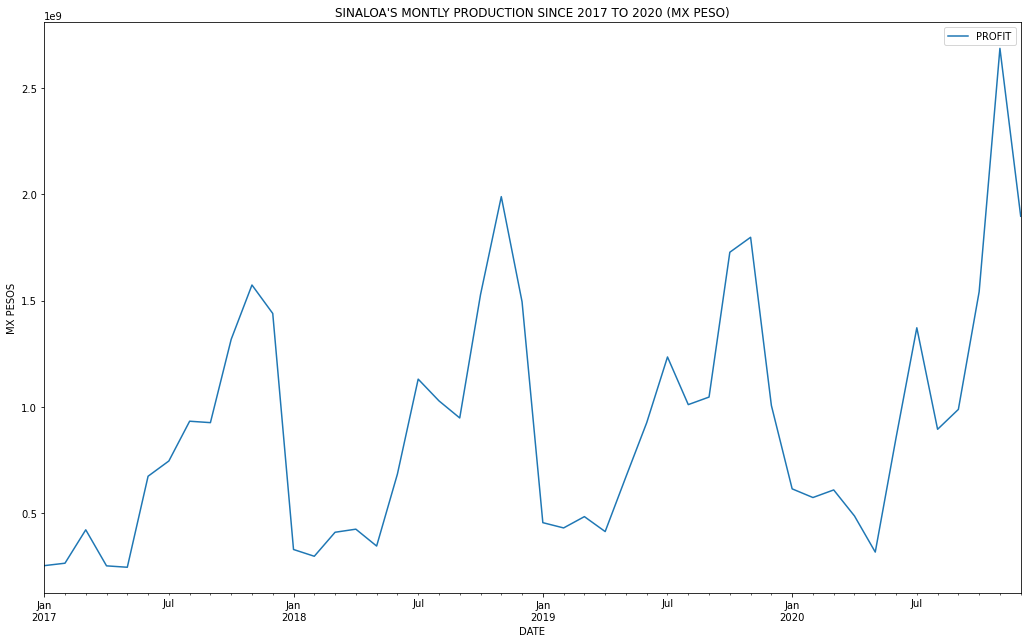

In [158]:
plt.rcParams["figure.figsize"] = [17.50, 10.50]
sinaloa_production.plot(y='PROFIT', use_index=True)
plt.title("SINALOA'S MONTLY PRODUCTION SINCE 2017 TO 2020 (MX PESO)")
plt.xlabel("DATE")
plt.ylabel("MX PESOS")
plt.show()

#### 3.7.2 Autocorrelation Function and seasonality Analysis of Sinaloa's production

1.-Help us uncover hidden patterns in our data and help us select the correct forecasting methods.
2.-Help identify seasonality in our time series data.
3.-Analyzing the autocorrelation function (ACF) and partial autocorrelation function (PACF) in conjunction is necessary for selecting the appropriate ARIMA model for any time series prediction.

<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

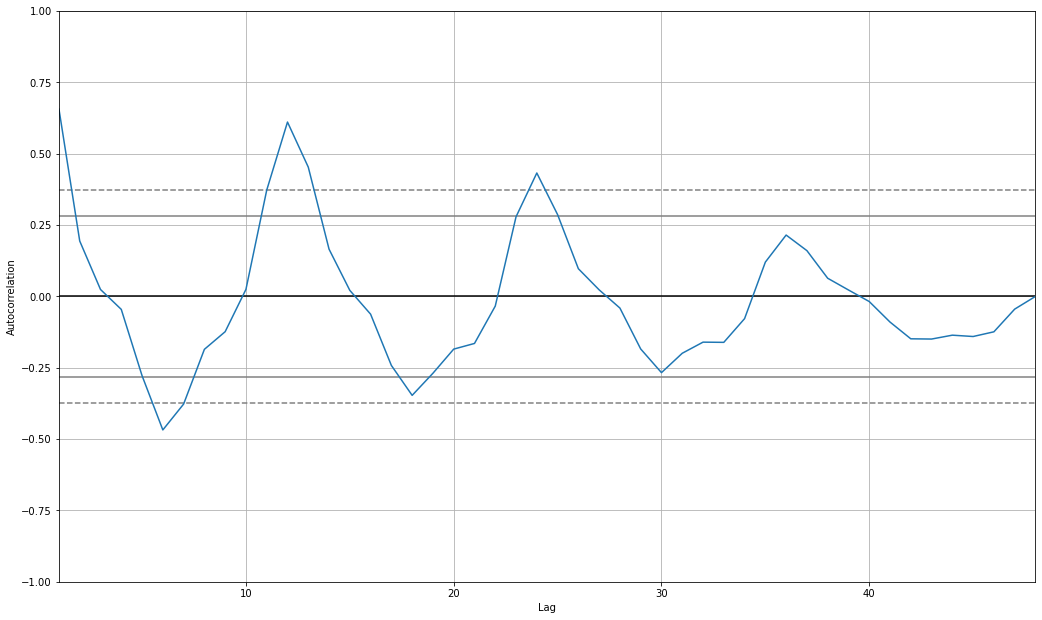

In [159]:
pd.plotting.autocorrelation_plot  

spacing = np.linspace(-9 * np.pi, 9 * np.pi, num=1000)
s = sinaloa_production["PROFIT"]

pd.plotting.autocorrelation_plot(s)
#<AxesSubplot:title={'center':'width'}, xlabel='Lag', ylabel='Autocorrelation'>

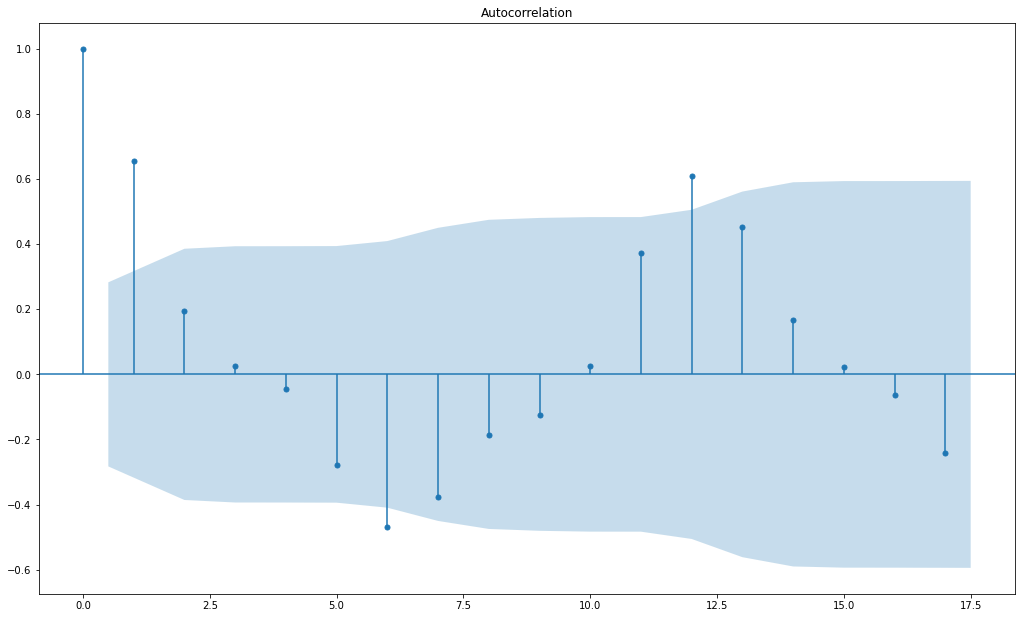

In [160]:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(s)
plt.show()

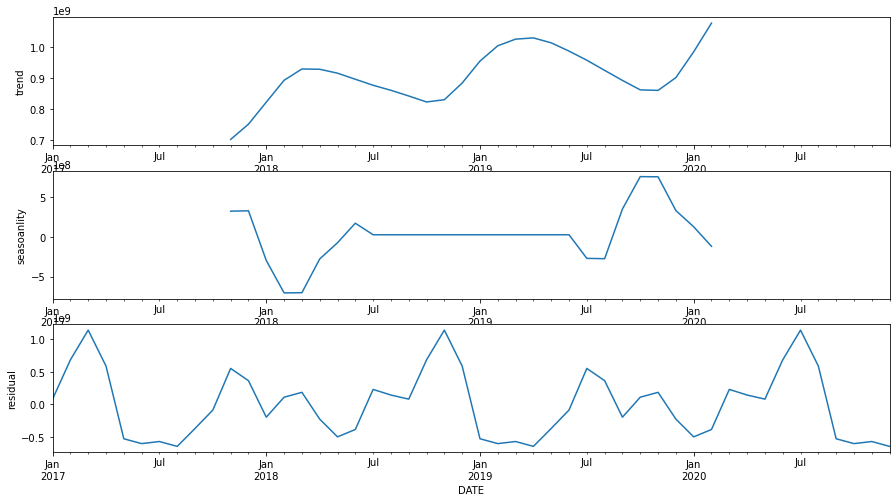

In [161]:
from statsmodels.tsa.seasonal import seasonal_decompose

res = seasonal_decompose(s, model = "additive", period = 20)

fig, (ax1,ax2,ax3) = plt.subplots(3,1, figsize=(15,8))
res.trend.plot(ax=ax1,ylabel = "trend")
res.resid.plot(ax=ax2,ylabel = "seasoanlity")
res.seasonal.plot(ax=ax3,ylabel = "residual")
plt.show()

In [162]:
df=pd.read_csv("data/sinaloa_production.csv",index_col="DATE",parse_dates=True)
df.index.freq=("MS")

<AxesSubplot:xlabel='DATE'>

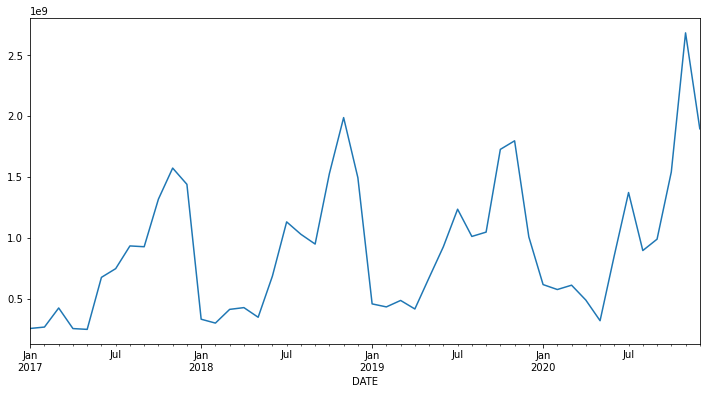

In [163]:
df["PROFIT"].plot(figsize=(12,6))

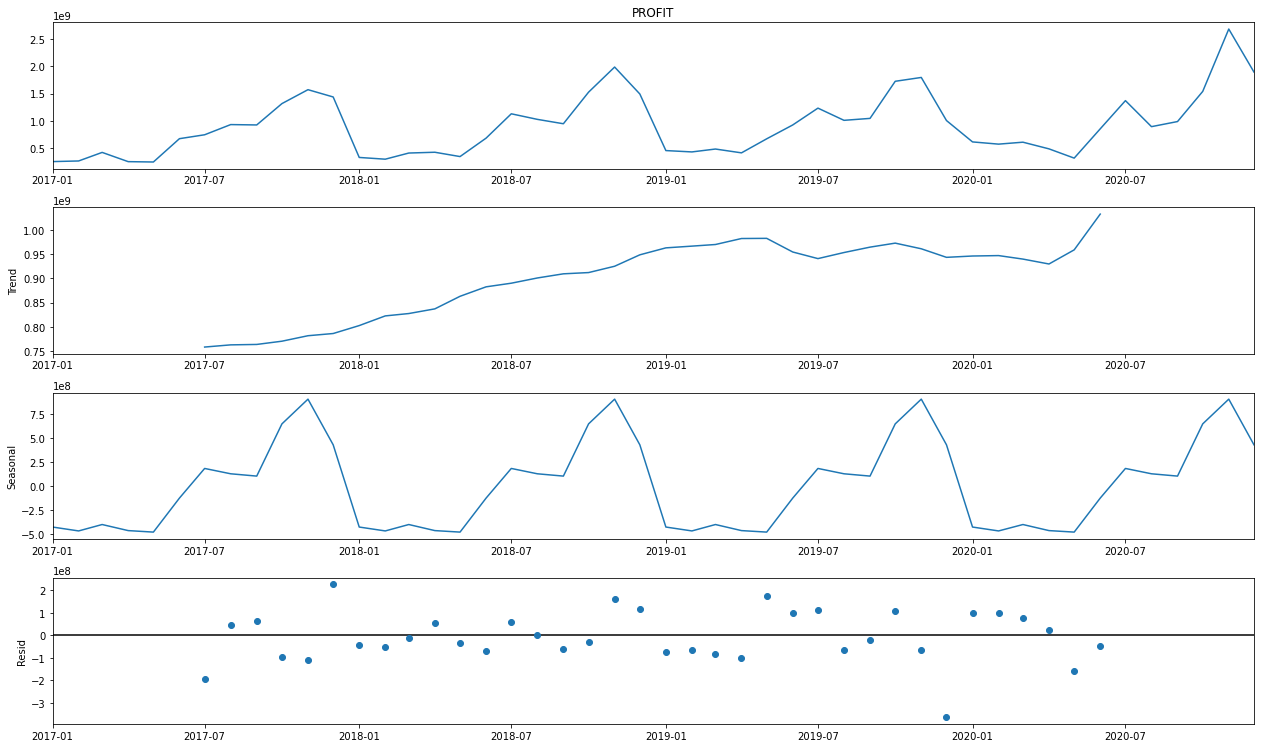

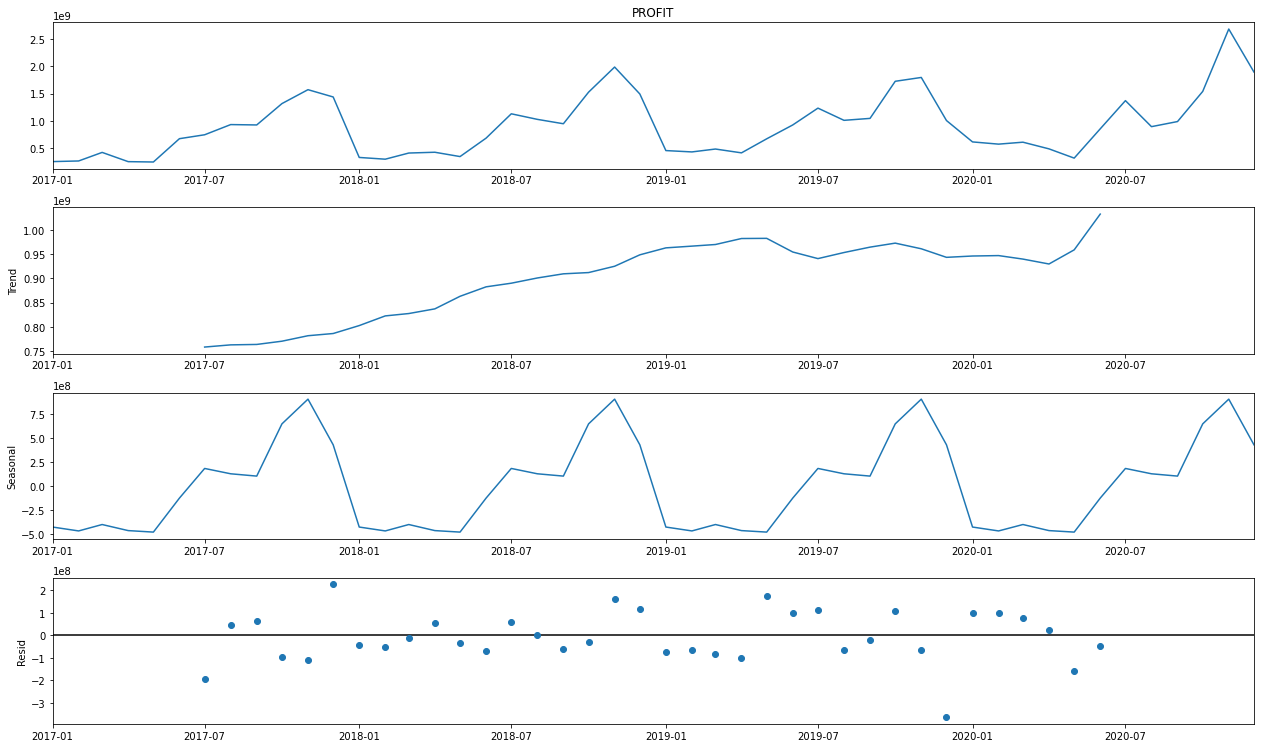

In [177]:
from statsmodels.tsa.seasonal import seasonal_decompose
results= seasonal_decompose(df["PROFIT"])
results.plot()

### 3.8 EDA insights

Although summer is the season in which more fishes are collected (june and july), the product value for the production obtained in months like october and november is higher. Meaning that in october and november more high value fish are capture eventhough the production is not as high.  
If we analyze the trend by year we will notice that after 2018 the kg of fish produced declined drastically, however the revenue kept increasing. This might be hinting that new methods for fishing could have been implemented like aquaculture. 


## 4. FORECASTING

### 4.1 libraries

In [195]:
import warnings

import numpy as np
from numpy import array
import pandas as pd
from pandas import concat
import math
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from statsmodels.tsa.arima_model import ARIMA
from sklearn.model_selection import ParameterGrid

pd.plotting.register_matplotlib_converters()

warnings.filterwarnings("ignore")

import logging
logger = logging.getLogger()
logger.setLevel(logging.CRITICAL)

def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [194]:
!pip install pmdarima
from pmdarima.arima import auto_arima

### 4.1 LSTM

In [204]:
resultsLongterm={'PROFIT':[0.0,0.0,0.0,0.0,0.0,0.0],
     'UNEMBARKED_KG':[0.0,0.0,0.0,0.0,0.0,0.0],
     'LIVE_CAPTURED_KG':[0.0,0.0,0.0,0.0,0.0,0.0]}
resultsLongtermdf = pd.DataFrame(resultsLongterm)
resultsLongtermdf.index = ['Vanilla LSTM MSE', 'Vanilla LSTM MAPE', 'Stacked LSTM MSE', 'Stacked LSTM MAPE',
                          'Bidirectional LSTM MSE', 'Bidirectional LSTM MAPE']

In [205]:
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense
from keras.layers import Bidirectional
from sklearn.preprocessing import MinMaxScaler

In [212]:
seed_value= 0
import os
os.environ['PYTHONHASHSEED']=str(seed_value)
import random
random.seed(seed_value)
import numpy as np
np.random.seed(seed_value)
import tensorflow as tf
tf.random.set_seed(seed_value)

session_conf = tf.compat.v1.ConfigProto(intra_op_parallelism_threads=1, inter_op_parallelism_threads=1)
sess = tf.compat.v1.Session(graph=tf.compat.v1.get_default_graph(), config=session_conf)
tf.compat.v1.keras.backend.set_session(sess)

In [249]:
# spliting sequence function for creationg of training and test set

def split_sequence(sequence, n_steps):
    X, y = list(), list()
    for i in range(len(sequence)):
        end_ix = i + n_steps
        if end_ix > len(sequence)-1:
            break
        seq_x, seq_y = sequence[i:end_ix], sequence[end_ix]
        X.append(seq_x)
        y.append(seq_y)
    return array(X), array(y)

size = int(len(df)-30)
n_steps=1
n_features = 1

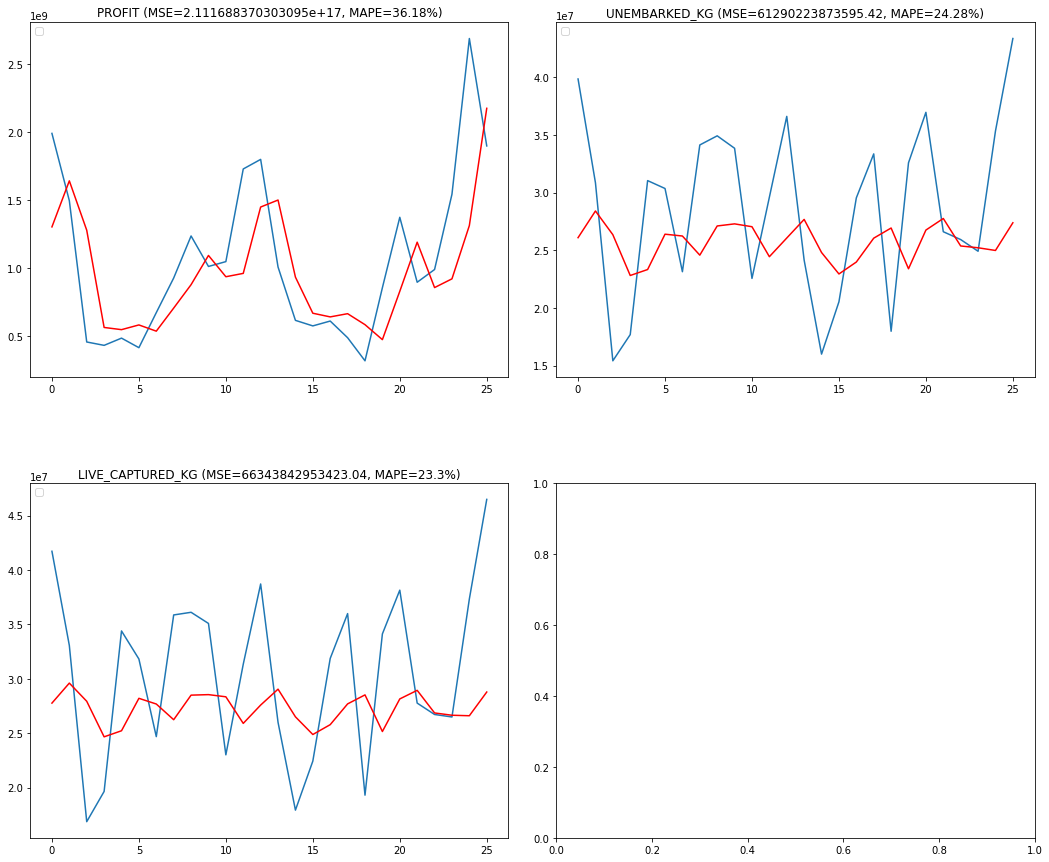

In [250]:

subplotindex=0
numrows=2
numcols=2
fig, ax = plt.subplots(numrows, numcols, figsize=(18,15))
plt.subplots_adjust(wspace=0.1, hspace=0.3)

warnings.filterwarnings("ignore")

r=['PROFIT','UNEMBARKED_KG','LIVE_CAPTURED_KG']
for x in r:
    rowindex=math.floor(subplotindex/numcols)
    colindex=subplotindex-(rowindex*numcols)
    X=df[x].values
    scaler = MinMaxScaler(feature_range = (0, 1))
    X=scaler.fit_transform(X.reshape(-1, 1))
    X_train,y_train=split_sequence(X[0:size], n_steps)
    X_test,y_test=split_sequence(X[size:len(df)], n_steps)
    X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], n_features))
    # MODEL DEFINITION
    model = Sequential()
    model.add(LSTM(100, activation='relu', input_shape=(n_steps, n_features)))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mse')
    model.fit(X_train, y_train, epochs=500, verbose=0)
    X_test = X_test.reshape((len(X_test), n_steps, n_features))
    predictions = model.predict(X_test, verbose=0)
    y_test=scaler.inverse_transform(y_test)
    predictions = scaler.inverse_transform(predictions)
    error = mean_squared_error(y_test, predictions)
    perror = mean_absolute_percentage_error(y_test, predictions)
    resultsLongtermdf.loc['Vanilla LSTM MSE',x]=error
    resultsLongtermdf.loc['Vanilla LSTM MAPE',x]=perror
    ax[rowindex,colindex].set_title(x+' (MSE=' + str(round(error,2))+', MAPE='+ str(round(perror,2)) +'%)')
    ax[rowindex,colindex].legend(['Real', 'Predicted'], loc='upper left')
    ax[rowindex,colindex].plot(y_test)
    ax[rowindex,colindex].plot(predictions, color='red')
    subplotindex=subplotindex+1
plt.show()

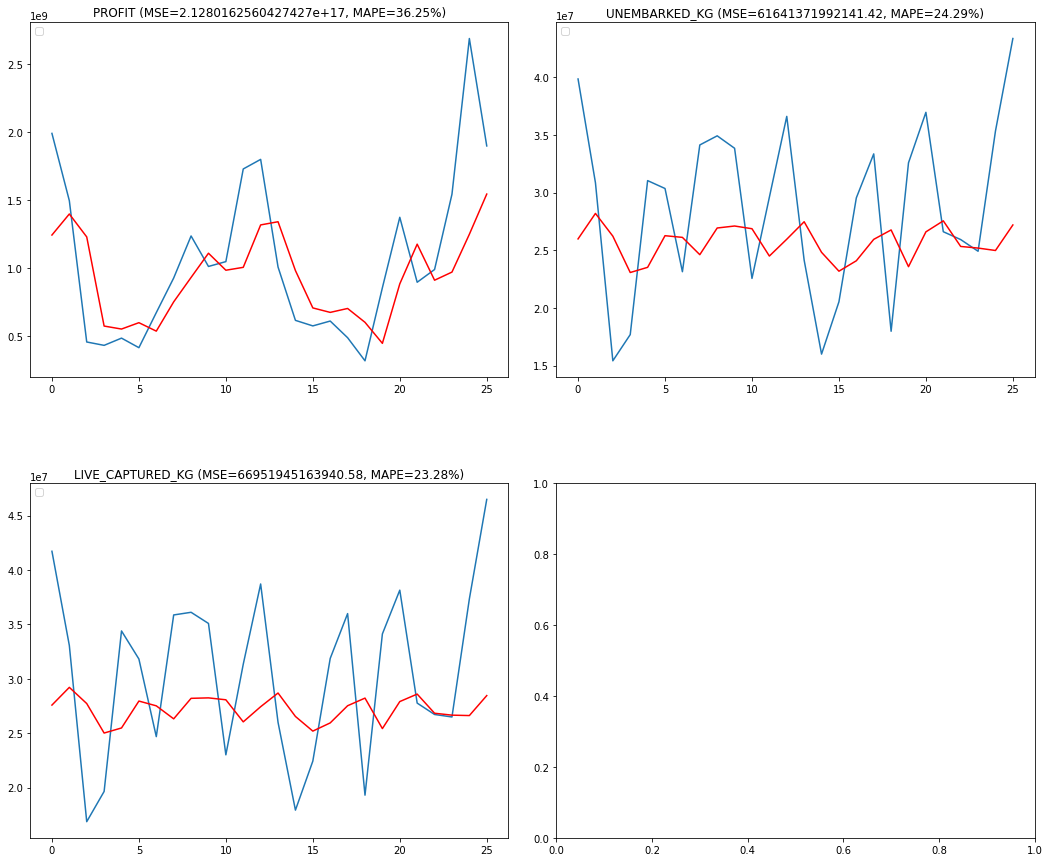

In [251]:

subplotindex=0
numrows=2
numcols=2
fig, ax = plt.subplots(numrows, numcols, figsize=(18,15))
plt.subplots_adjust(wspace=0.1, hspace=0.3)

warnings.filterwarnings("ignore")

r=['PROFIT','UNEMBARKED_KG','LIVE_CAPTURED_KG']
for x in r:
    rowindex=math.floor(subplotindex/numcols)
    colindex=subplotindex-(rowindex*numcols)
    X=df[x].values
    scaler = MinMaxScaler(feature_range = (0, 1))
    X=scaler.fit_transform(X.reshape(-1, 1))
    X_train,y_train=split_sequence(X[0:size], n_steps)
    X_test,y_test=split_sequence(X[size:len(df)], n_steps)
    X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], n_features))
    
    model = Sequential()
    model.add(LSTM(100, activation='relu', return_sequences=True, input_shape=(n_steps, n_features)))
    model.add(LSTM(100, activation='relu'))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mse')
    model.fit(X_train, y_train, epochs=400, verbose=0)
    
    X_test = X_test.reshape((len(X_test), n_steps, n_features))
    predictions = model.predict(X_test, verbose=0)
    y_test=scaler.inverse_transform(y_test)
    predictions = scaler.inverse_transform(predictions)
    error = mean_squared_error(y_test, predictions)
    perror = mean_absolute_percentage_error(y_test, predictions)
    resultsLongtermdf.loc['Stacked LSTM MSE',x]=error
    resultsLongtermdf.loc['Stacked LSTM MAPE',x]=perror
    ax[rowindex,colindex].set_title(x+' (MSE=' + str(round(error,2))+', MAPE='+ str(round(perror,2)) +'%)')
    ax[rowindex,colindex].legend(['Real', 'Predicted'], loc='upper left')
    ax[rowindex,colindex].plot(y_test)
    ax[rowindex,colindex].plot(predictions, color='red')
    subplotindex=subplotindex+1
plt.show()

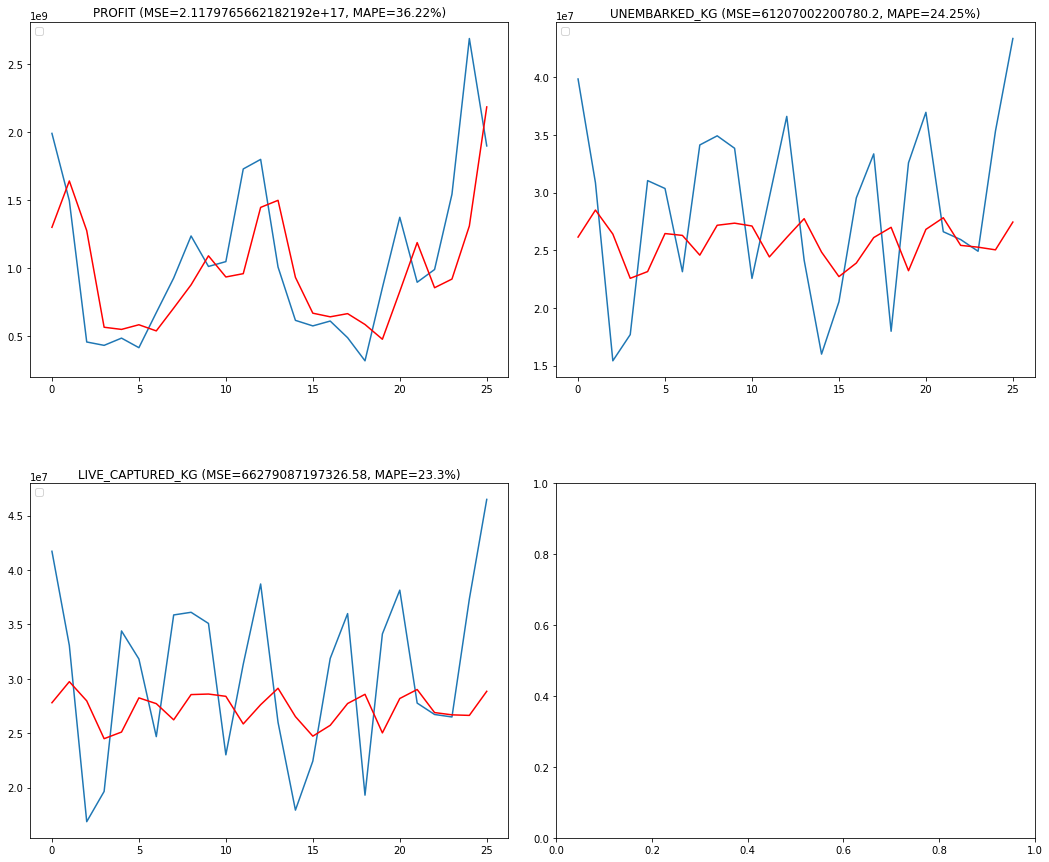

In [252]:

subplotindex=0
numrows=2
numcols=2
fig, ax = plt.subplots(numrows, numcols, figsize=(18,15))
plt.subplots_adjust(wspace=0.1, hspace=0.3)

warnings.filterwarnings("ignore")

r=['PROFIT','UNEMBARKED_KG','LIVE_CAPTURED_KG']
for x in r:
    rowindex=math.floor(subplotindex/numcols)
    colindex=subplotindex-(rowindex*numcols)
    X=df[x].values
    scaler = MinMaxScaler(feature_range = (0, 1))
    X=scaler.fit_transform(X.reshape(-1, 1))
    X_train,y_train=split_sequence(X[0:size], n_steps)
    X_test,y_test=split_sequence(X[size:len(df)], n_steps)
    X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], n_features))

    model = Sequential()
    model.add(Bidirectional(LSTM(50, activation='relu'), input_shape=(n_steps, n_features)))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mse')
    model.fit(X_train, y_train, epochs=400, verbose=0)

    X_test = X_test.reshape((len(X_test), n_steps, n_features))
    predictions = model.predict(X_test, verbose=0)
    y_test=scaler.inverse_transform(y_test)
    predictions = scaler.inverse_transform(predictions)
    error = mean_squared_error(y_test, predictions)
    perror = mean_absolute_percentage_error(y_test, predictions)
    resultsLongtermdf.loc['Bidirectional LSTM MSE',x]=error
    resultsLongtermdf.loc['Bidirectional LSTM MAPE',x]=perror
    ax[rowindex,colindex].set_title(x+' (MSE=' + str(round(error,2))+', MAPE='+ str(round(perror,2)) +'%)')
    ax[rowindex,colindex].legend(['Real', 'Predicted'], loc='upper left')
    ax[rowindex,colindex].plot(y_test)
    ax[rowindex,colindex].plot(predictions, color='red')
    subplotindex=subplotindex+1
plt.show()

In [253]:
from IPython.display import display, HTML
display(HTML(resultsLongtermdf.to_html()))

,PROFIT,UNEMBARKED_KG,LIVE_CAPTURED_KG
Vanilla LSTM MSE,2.111688e+17,6.129022e+13,6.634384e+13
Vanilla LSTM MAPE,3.618426e+01,2.427782e+01,2.329999e+01
Stacked LSTM MSE,2.128016e+17,6.164137e+13,6.695195e+13
Stacked LSTM MAPE,3.624653e+01,2.428539e+01,2.328345e+01
Bidirectional LSTM MSE,2.117977e+17,6.120700e+13,6.627909e+13
Bidirectional LSTM MAPE,3.621580e+01,2.424734e+01,2.329695e+01
